In [31]:
import tensorflow as tf
import keras

import matplotlib.pyplot as plt
import numpy as np

In [16]:
from keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions
from keras import backend as K
from keras.preprocessing import image

In [4]:
iv3 = InceptionV3()

In [5]:
print(iv3.summary())

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 299, 299, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 149, 149, 32)      │             864 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization           │ (None, 149, 149, 32)      │              96 │ conv2d[0][0]               │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation (Activation)       │ (None, 149, 149, 32)      │               0 │ batch_normalization[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_1 (Conv2D)             │ (None, 147, 147, 32)      │           9,216 │ activation[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_1         │ (None, 147, 147, 32)      │              96 │ conv2d_1[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_1 (Activation)     │ (None, 147, 147, 32)      │               0 │ batch_normalization_1[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_2 (Conv2D)             │ (None, 147, 147, 64)      │          18,432 │ activation_1[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_2         │ (None, 147, 147, 64)      │             192 │ conv2d_2[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_2 (Activation)     │ (None, 147, 147, 64)      │               0 │ batch_normalization_2[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 73, 73, 64)        │               0 │ activation_2[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_3 (Conv2D)             │ (None, 73, 73, 80)        │           5,120 │ max_pooling2d[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_3         │ (None, 73, 73, 80)        │             240 │ conv2d_3[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_3 (Activation)     │ (None, 73, 73, 80)        │               0 │ batch_normalization_3[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_4 (Conv2D)             │ (None, 71, 71, 192)       │         138,240 │ activation_3[0][0]         │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 23,851,784 (90.99 MB)

 Trainable params: 23,817,352 (90.86 MB)

 Non-trainable params: 34,432 (134.50 KB)

None


In [26]:
from keras.preprocessing import image 

# Cargar y preprocesar la imagen
img = image.load_img("./gato.jpeg", target_size=(299, 299))
x = image.img_to_array(img)
x = preprocess_input(x)
x = np.expand_dims(x, axis=0)
x = tf.convert_to_tensor(x)

print(x.shape)

y = iv3.predict(x)
decode_predictions(y)

(1, 299, 299, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


[[('n02123045', 'tabby', 0.59687704),
  ('n02123159', 'tiger_cat', 0.2697542),
  ('n02124075', 'Egyptian_cat', 0.070087455),
  ('n02127052', 'lynx', 0.00064540555),
  ('n04040759', 'radiator', 0.0005285211)]]

In [47]:
from keras.preprocessing import image 

# Cargar y preprocesar la imagen
img = image.load_img("./hacked.png", target_size=(299, 299))
x = image.img_to_array(img)
x = preprocess_input(x)
x = np.expand_dims(x, axis=0)
x = tf.convert_to_tensor(x)

print(x.shape)

y = iv3.predict(x)
decode_predictions(y)

(1, 299, 299, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


[[('n07749582', 'lemon', 0.99946076),
  ('n04509417', 'unicycle', 0.00012326636),
  ('n07747607', 'orange', 0.000105879255),
  ('n07718472', 'cucumber', 6.9582544e-05),
  ('n07753592', 'banana', 1.4675135e-05)]]

## ATAQUES ADVERSARIOS


In [43]:
inp_layer = iv3.input
out_layer = iv3.output

# Definir la clase objetivo
target_class = 951

# Copiar la imagen de entrada y convertirla a un tensor de TensorFlow
adv = tf.identity(x)

# Inicializar el costo
cost = 0.0

pert = 0.01
max_pert = x + 0.01
min_pert = x - 0.01

# Bucle para optimizar el costo
while cost < 0.95:
    with tf.GradientTape() as tape:
        # Hacer seguimiento del gradiente de la imagen adversarial
        tape.watch(adv)
        predictions = iv3(adv)
        loss = predictions[:, target_class]
    
    # Calcular el gradiente de la pérdida con respecto a la imagen de entrada
    grad = tape.gradient(loss, adv)

    # Actualizar la imagen adversarial
    adv = tf.add(adv, grad)
    adv = tf.clip_by_value(adv, min_pert, max_pert)
    adv = tf.clip_by_value(adv, -1, 1)
    
    # Actualizar el costo
    cost = loss.numpy()

    print("Target cost:", cost)

# Realizar predicción final con la imagen adversarial
y = iv3.predict(adv)
print(decode_predictions(y, top=3))

Target cost: [3.6211844e-05]
Target cost: [3.6353318e-05]
Target cost: [3.649548e-05]
Target cost: [3.663834e-05]
Target cost: [3.6782123e-05]
Target cost: [3.6925307e-05]
Target cost: [3.7069127e-05]
Target cost: [3.7214148e-05]
Target cost: [3.7360493e-05]
Target cost: [3.7507543e-05]
Target cost: [3.7655765e-05]
Target cost: [3.7805097e-05]
Target cost: [3.7955826e-05]
Target cost: [3.810735e-05]
Target cost: [3.825927e-05]
Target cost: [3.8411312e-05]
Target cost: [3.8564758e-05]
Target cost: [3.8719034e-05]
Target cost: [3.887369e-05]
Target cost: [3.9030394e-05]
Target cost: [3.9187686e-05]
Target cost: [3.93456e-05]
Target cost: [3.9504564e-05]
Target cost: [3.966543e-05]
Target cost: [3.9827308e-05]
Target cost: [3.9989714e-05]
Target cost: [4.0152594e-05]
Target cost: [4.0315914e-05]
Target cost: [4.0480252e-05]
Target cost: [4.0646162e-05]
Target cost: [4.081375e-05]
Target cost: [4.0982184e-05]
Target cost: [4.1151336e-05]
Target cost: [4.132248e-05]
Target cost: [4.1495514e

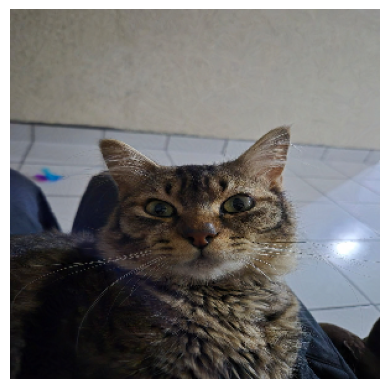

In [44]:
adv_image = (adv + 1) / 2.0

# Eliminar la dimensión extra (si es necesario)
adv_image = tf.squeeze(adv_image)

# Convertir el tensor a numpy para mostrarlo
adv_image_np = adv_image.numpy()

# Mostrar la imagen usando plt
plt.imshow(adv_image_np)
plt.axis('off')  # Ocultar los ejes
plt.show()

In [46]:
from PIL import Image
import numpy as np
import tensorflow as tf

# Convertir el tensor 'adv' a numpy
adv_image_np = adv[0].numpy()

# Escalar los valores de -1 a 1 al rango 0-255
adv_image_np = ((adv_image_np + 1) * 127.5).astype(np.uint8)

# Crear una imagen a partir del array numpy
im = Image.fromarray(adv_image_np)

# Guardar la imagen
im.save('./hacked.png')

print("Imagen guardada como 'hacked.png'")

Imagen guardada como 'hacked.png'


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.018012285..1.009376].


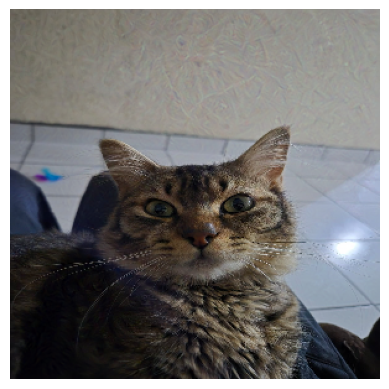

In [38]:
adv_image = (adv + 1) / 2.0

# Eliminar la dimensión extra (si es necesario)
adv_image = tf.squeeze(adv_image)

# Convertir el tensor a numpy para mostrarlo
adv_image_np = adv_image.numpy()

# Mostrar la imagen usando plt
plt.imshow(adv_image_np)
plt.axis('off')  # Ocultar los ejes
plt.show()